# Solution for HW2

## Chapter 1

1. https://blog.princehonest.com/stat-learning/ch5/1.html
2. 

a. 1−1/n

b. 1−1/n

c. In bootstrap, we sample with replacement so each observation in the bootstrap sample has the same 1/n (independent) chance of equaling the jth observation. Applying the product rule for a total of n observations gives us $(1−1/n)^n$.

d. $\Pr(in)=1-\Pr(out)=1-(1-1/5)^5=1-(4/5)^5=67.1\%$

e. $\Pr(in)=1-\Pr(out)=1-(1-1/100)^{100}=1-(99/100)^{100}=63.4\%$

f. $1-(1-1/10000)^{10000}=63.2\%$

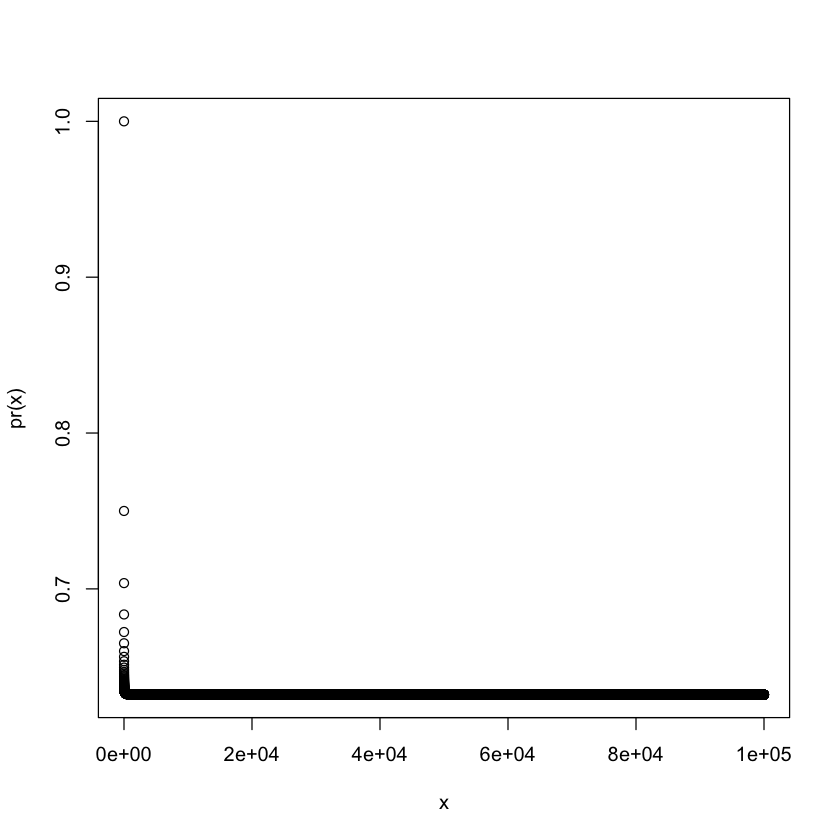

In [1]:
# g.
pr = function(n) return(1 - (1 - 1/n)^n)
x = 1:1e+05
plot(x, pr(x))

The plot quickly reaches an asymptote of about 63.2%.

In [2]:
# 5. 
library(ISLR)
summary(Default)
attach(Default)

# a.
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)

# b.
FiveB = function() {
    # i.
    train = sample(dim(Default)[1], dim(Default)[1]/2)
    # ii.
    glm.fit = glm(default ~ income + balance, data = Default, family = binomial, 
        subset = train)
    # iii.
    glm.pred = rep("No", dim(Default)[1]/2)
    glm.probs = predict(glm.fit, Default[-train, ], type = "response")
    glm.pred[glm.probs > 0.5] = "Yes"
    # iv.
    return(mean(glm.pred != Default[-train, ]$default))
}
FiveB()

# c.
FiveB()
FiveB()
FiveB()

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

[1] 0.0254

[1] 0.0274

[1] 0.0244

[1] 0.0244

It seems to average around 2.6% test error rate.

In [3]:
# d.
train = sample(dim(Default)[1], dim(Default)[1]/2)
glm.fit = glm(default ~ income + balance + student, data = Default, family = binomial, 
    subset = train)
glm.pred = rep("No", dim(Default)[1]/2)
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.pred[glm.probs > 0.5] = "Yes"
mean(glm.pred != Default[-train, ]$default)

[1] 0.0278

2.78% test error rate, with student dummy variable. Using the validation set approach, it doesn't appear adding the student dummy variable leads to a reduction in the test error rate.

In [4]:
# 6.
library(ISLR)
summary(Default)
attach(Default)

# a.
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)

# b.
boot.fn = function(data, index) return(coef(glm(default ~ income + balance, 
    data = data, family = binomial, subset = index)))

# c.
library(boot)
boot(Default, boot.fn, 50)


 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

The following objects are masked from Default (pos = 3):

    balance, default, income, student




Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -5.661486e-02 4.847786e-01
t2*  2.080898e-05 -7.436578e-08 4.456965e-06
t3*  5.647103e-03  1.854126e-05 2.639029e-04

d. Similar answers to the second and third significant digits.

## Chapter 6

1. 

a. Best subset selection has the smallest training RSS because the other two methods determine models with a path dependency on which predictors they pick first as they iterate to the k'th model.

b. Best subset selection may have the smallest test RSS because it considers more models then the other methods. However, the other models might have better luck picking a model that fits the test data better.

c. i. True. ii. True. iii. False. iv. False. v. False.


2. 

a. (LASSO) iii. Less flexible and better predictions because of less variance, more bias

b. (Ridge) Same as lasso. iii.
 
c. (Non-linear methods) ii. More flexible, less bias, more variance


3. 

a. k-fold cross-validation is implemented by taking the set of n observations and randomly splitting into k non-overlapping groups. Each of these groups acts as a validation set and the remainder as a training set. The test error is estimated by averaging the k resulting MSE estimates.

b. i. The validation set approach is conceptually simple and easily implemented as you are simply partitioning the existing training data into two sets. However, there are two drawbacks: (1.) the estimate of the test error rate can be highly variable depending on which observations are included in the training and validation sets. (2.) the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

ii. LOOCV is a special case of k-fold cross-validation with k = n. Thus, LOOCV is the most computationally intense method since the model must be fit n times. Also, LOOCV has higher variance, but lower bias, than k-fold CV.


4. If we suppose using some statistical learning method to make a prediction for the response Y for a particular value of the predictor X we might estimate the standard deviation of our prediction by using the bootstrap approach. The bootstrap approach works by repeatedly sampling observations (with replacement) from the original data set B times, for some large value of B, each time fitting a new model and subsequently obtaining the RMSE of the estimates for all B models.

## Coding part

In [5]:
dat <- read.csv("/Users/cmx/Documents/courses/HKUST/TA-Statistical-Machine-Learning/HW2/hw2_dat.csv")
X <- data.matrix(dat[,1:45])
y <- dat[,46]
lam <- read.csv("/Users/cmx/Documents/courses/HKUST/TA-Statistical-Machine-Learning/HW2/hw2_lam.csv")$x
loglam <- log10(lam)
nlam <- length(lam)

In [6]:
ridgeReg <- function(X, y, lambda=NULL) {
  
  n  <- nrow(X)
  p  <- ncol(X)
  
  #Scaling 

    ym <- mean(y)
    y  <- y-ym
    Xm <- colMeans(X)
    X <- scale(X,center = T,scale = F)
    Xsd <- sqrt(colMeans(X^2))
    X <- apply(X,MARGIN = 1,function(X,sd) X/sd,sd=Xsd)
    X <- t(X)

  
  XX <- t(X)%*%X
  Xy <- t(X)%*%y
  
  #pre-calculate eigenvalues and eigenvectors
  eigenXX <- eigen(XX)
  D <- eigenXX$values
  U <- eigenXX$vectors
  
  #default lambda setting
  if(is.null(lambda)) {
    loglam <- seq(5*log10(max(D)),-0.5*log10(max(D)),length.out = 100)
    lambda <- exp(loglam)
  }
  
  ns <- length(lambda)

  beta <- matrix(0,p,ns)
  
  #Fit the path
  for(i in 1:ns) {
    LAM <- rep(lambda[i],p)
    
    beta[,i] <- U%*%(t(U)%*%Xy/(LAM+D))
    XU <- X%*%U
  }
  
  #Recover the intercept

    beta <- beta/Xsd
    w0 <- ym - colSums(beta*Xm)
    beta <- rbind(w0,beta)
  
  beta <- list(w=beta,lambda=lambda,eigvalues=D)
  attr(beta, "class") <- "ridgeReg"
  return(beta)
}

predict.ridgeReg <- function(object, X) {
  X <- cbind(1,X)
  y_h <- X %*% object$w
}

In [7]:
ridgeReg_CD <- function(X, y, lambda=NULL,maxIter=200,tol=1e-6,warm_start=T) {
  
  n  <- nrow(X)
  p  <- ncol(X)
  
  #Scaling 

    ym <- mean(y)
    y  <- y-ym
    Xm <- colMeans(X)
    X <- scale(X,center = T,scale = F)
    Xsd <- sqrt(colMeans(X^2))
    X <- apply(X,MARGIN = 1,function(X,sd) X/sd,sd=Xsd)
    X <- t(X)

  
  XX <- t(X)%*%X
  XX_sum <- colSums(X^2)
  Xy <- t(X)%*%y

  #default lambda setting
  if(is.null(lambda)) {
 #pre-calculate eigenvalues and eigenvectors
  eigenXX <- eigen(XX)
  D <- eigenXX$values
  U <- eigenXX$vectors
    loglam <- seq(5*log10(max(D)),-0.5*log10(max(D)),length.out = 100)
    lambda <- exp(loglam)
  }
    if(warm_start){
        lambda <- sort(lambda,decreasing = T)
    }
  
  ns <- length(lambda)

  beta <- matrix(0,p,ns)
  num_iter <- rep(0,ns)
  # initial value of beta
  beta_old <- rep(0,p)
               
  #Fit the path
  for(i in 1:ns) {
      betat <- beta_old
      yhat <- X%*%betat
      obj <- rep(0,maxIter)
      obj[1] <-  evalObj(y,yhat,betat,lambda[i])
      
      for(iter in 2:maxIter){
          for(j in 1:p){
              betat[j] <- (t(X[,j]) %*% (y-yhat) + XX_sum[j]*beta_old[j])/(XX_sum[j]+lambda[i])
              diff_beta <- beta_old[j] - betat[j]
              yhat <- yhat - X[,j]*diff_beta
              beta_old[j] <- betat[j]
          }
          obj[iter] <- evalObj(y,yhat,betat,lambda[i])
          if(abs(obj[iter-1]-obj[iter])/obj[iter-1]<tol){
              obj <- obj[1:iter]
              break
          }
      }
      num_iter[i] <- iter
      beta[,i] <- betat
  }
  
  #Recover the intercept

    beta <- beta/Xsd
    w0 <- ym - colSums(beta*Xm)
    beta <- rbind(w0,beta)
  
  beta <- list(w=beta,lambda=lambda,num_iter=num_iter)
  attr(beta, "class") <- "ridgeReg"
  return(beta)
}

predict.ridgeReg <- function(object, X) {
  X <- cbind(1,X)
  y_h <- X %*% object$w
}
               
evalObj <- function(y,yhat,betat,lam){
  # 1 / (2 * nobs) RSS + 1/2*lambda * penalty
  n <- length(y)
  out <- 0.5 * sum((y-yhat)^2) + 0.5*lam*sum((betat)^2)
  out
}

In [8]:
cv.ridgeReg <- function(X, y, lambda, nfolds=10, ...){
  p <- ncol(X)
  n <- nrow(X)


  # decide the cv assignments
  idx <- round(sample(1:n)/n*nfolds)

  testErr  <- matrix(0,nfolds,length(lambda))

  # report settings
  message("Info: Number of variables: ", p)
  message("Info: Sample size: ", n)
  message("Info: Number of cv folds: ", nfolds)

  cat("start cv process......... total",nfolds,"validation sets \n")

  for(i in 1:nfolds) {
    cat(i,"-th validation set... \n")

    X_train <- X[idx!=i,]
    y_train <- y[idx!=i]

    X_test  <- matrix(X[idx==i,],ncol = p)
    y_test  <- y[idx==i]


    fit <- ridgeReg_CD(X_train,y_train,lambda=lambda,...)

    testErr[i,]  <- colMeans((y_test-predict(fit,X_test))^2)
  }

  cvsd <- sqrt(apply(testErr,MARGIN = 2,var)/(nfolds-1))
  cvm  <- colMeans(testErr)
  idx.min <- which.min(cvm)
  lambda.min <- fit$lambda[idx.min]

  ridgeReg.fit <- ridgeReg_CD(X,y,lambda.min)

  cv_ridge <- list(cvm=cvm,cvsd=cvsd,lambda=fit$lambda,lambda.min=lambda.min,ridgeReg.fit=ridgeReg.fit,testErr=testErr)
  attr(cv_ridge,"class") <- "cv.ridgeReg"

  return(cv_ridge)
}
plot.cv.ridgeReg <- function(object,width=0.01,...) {

  x <- log(object$lambda)
  y <- object$cvm
  
  upper <- y+object$cvsd/2
  lower <- y-object$cvsd/2
  ylim  <- range(upper,lower)
  barw  <- diff(range(x))*width
    
  plot(x,y,ylim = ylim,type = "n",xlab = "Log(Lambda)",ylab = "Mean Squared Error",...)
  
  segments(x,lower,x,upper,col="darkgrey")
  segments(x-barw,lower,x+barw,lower,col="darkgrey")
  segments(x-barw,upper,x+barw,upper,col="darkgrey")
  points(x,y,col="red",pch=20)
  
  abline(v=log(object$lambda.min),lty=3)
}

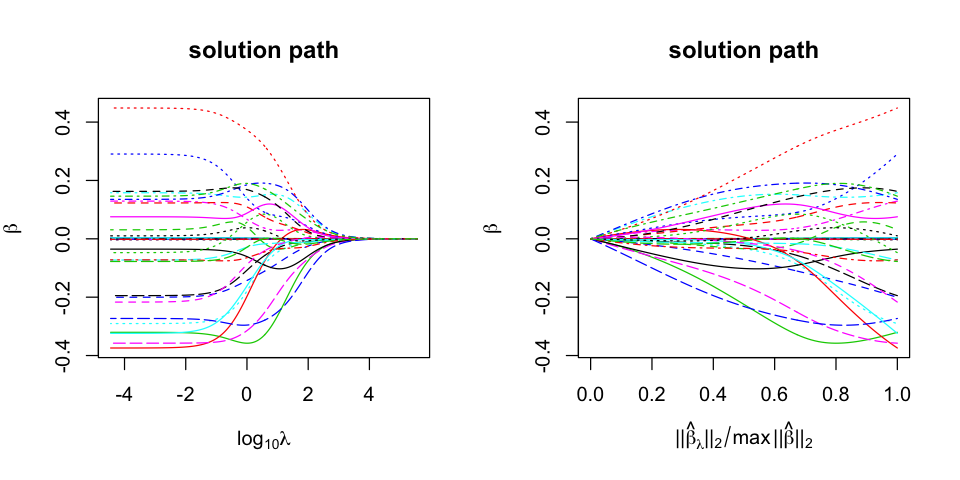

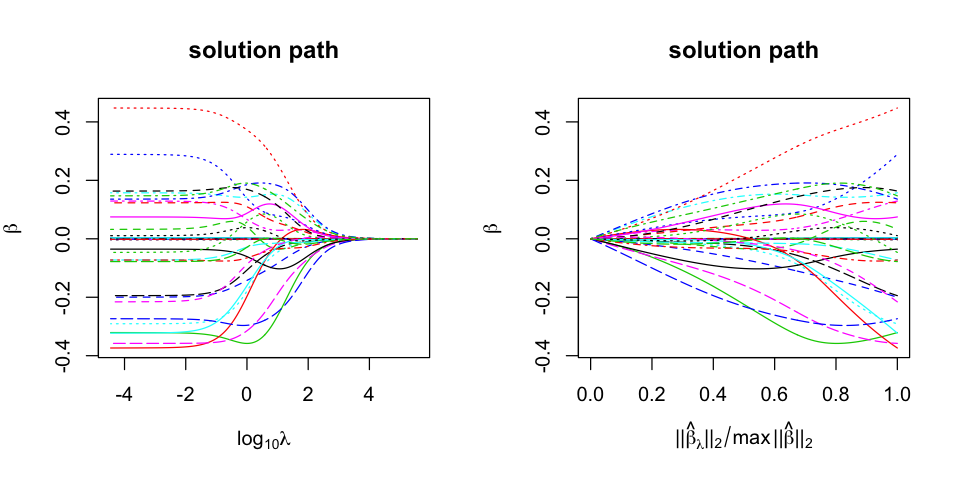

In [9]:
# CD algorithm
fit1 <- ridgeReg_CD(X,y,lam,maxIter = 200)

# closed form
fit <- ridgeReg(X,y,lam)

library(repr)
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow=c(1,2))
matplot(loglam,t(fit$w[-1,]),type="l",xlab=expression(log[10]*lambda),
        ylab=expression(beta),main="solution path")
matplot(sqrt(colSums(fit$w[-1,]^2)/sum(fit$w[-1,nlam]^2)),t(fit$w[-1,]),type="l",xlab=expression("||"*hat(beta)[lambda]*"||"[2]/max("||"*hat(beta)*"||"[2])),
        ylab=expression(beta),main="solution path")

par(mfrow=c(1,2))
matplot(loglam,t(fit1$w[-1,]),type="l",xlab=expression(log[10]*lambda),
        ylab=expression(beta),main="solution path")
matplot(sqrt(colSums(fit1$w[-1,]^2)/sum(fit1$w[-1,nlam]^2)),t(fit1$w[-1,]),type="l",xlab=expression("||"*hat(beta)[lambda]*"||"[2]/max("||"*hat(beta)*"||"[2])),
        ylab=expression(beta),main="solution path")

In [10]:
# CD algorithm without warm start
fit2 <- ridgeReg_CD(X,y,sample(lam,length(lam),replace = F),maxIter = 200,warm_start=F)
fit1$num_iter
fit2$num_iter


[1]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [26]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
 [51]  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
 [76]  5  5  6  6  6  6  6  7  7  7  7  8  8  8  9  9 10 10 11 12 12 13 14 15 16
[101] 17 19 20 21 22 24 25 27 28 30 31 33 35 37 39 40 42 44 46 47 49 50 51 52 52
[126] 52 52 52 52 51 50 49 47 46 44 42 40 38 37 34 32 31 28 27 25 23 21 20 18 17
[151] 15 14 13 12 11 10  9  8  8  7  6  6  5  5  5  4  4  3  3  3  3  3  2  2  2
[176]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

[1]   3 200  73 156   4   3 200  11 200   4 200  44   4 200  96   8  93   5
 [19]   6   4  63   4   3   7 200 120  39   8   9   5   3   5   4  20 200 126
 [37]   4 200  42  63  20  16   4 200 111 185  68  11  72 200   4 109   6 200
 [55]  14  20   4   5 200   4 200  28   4 200  47  33  13   6   8   5  10  38
 [73] 200   4 200   8   4 174 171  31 197 166   2   2   5   9   5   4   6 200
 [91]  15 200   4 200  26 200   4   3 200   4 200   5   5   5   4   6 200  94
[109] 129   9 200   5 200   4 200   5   4 200  54   2 136 109   5  36   5   4
[127] 200   4 133  42   4 200   4   4   3  93  20  34   4   9 200  18   7 200
[145]   7   5   5   4   3   5 200  99 148   5   4 200  49  13 200 129  95   5
[163] 105 200   4  31 200  25 200  17 200  79   4   3 200  69  98 150   4 200
[181]  65   5 127 200   7 200 133   4  49   4   3  47 200   4  68 133  19 200
[199]  41   4

Info: Number of variables: 45
Info: Sample size: 50
Info: Number of cv folds: 10


start cv process......... total 10 validation sets 
1 -th validation set... 
2 -th validation set... 
3 -th validation set... 
4 -th validation set... 
5 -th validation set... 
6 -th validation set... 
7 -th validation set... 
8 -th validation set... 
9 -th validation set... 
10 -th validation set... 


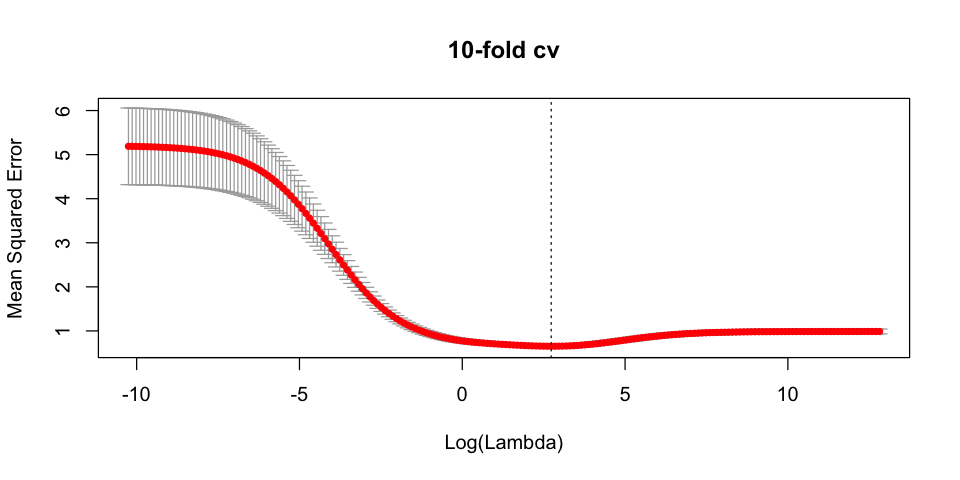

In [11]:
set.seed(10) 
nfold_10 <- cv.ridgeReg(X,y,lambda=lam,nfolds = 10)
plot(nfold_10,main="10-fold cv")